### Sentiment effect  
After getting the sentiment score, we could compare the price trend and daily score to see if there's a relationship between them.  
Based on the score system, the sentiment data is classified as positive, negative, and the standardlizations. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# set plot type
plt.rcParams['figure.figsize'] = (16, 4)
font = {'family': 'Segoe Script', 'weight': 'normal', 'size': 15}
plt.rc('font',**font)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.unicode_minus']=False # show minus

Read in the sentiment score data(unclassified news)  

In [3]:
df_s = pd.read_csv('./data/all_news _score.csv')
df_s.tail()

,Unnamed: 0,Date,Content,positive,negative,positive_std,negative_std
2040,2040,2019-05-28,"1 Min ReadLONDON, May 28 (Reuters) - British f...",0.029436,0.019865,0.724439,-0.785940
2041,2041,2019-05-29,"3 Min ReadTUCSON, Ariz. (Reuters) - An Arizona...",0.027447,0.022797,0.283517,-0.197503
2042,2042,2019-05-30,2 Min Read(Reuters) - Juul Labs Inc is conside...,0.028865,0.021533,0.597983,-0.451094
2043,2043,2019-05-31,"1 Min ReadBOGOTA, May 31 (Reuters) - Colombia’...",0.026845,0.021770,0.150212,-0.403583
2044,2044,2019-06-01,"3 Min ReadMIERCUREA-CIUC, Romania (Reuters) - ...",0.028560,0.022213,0.530316,-0.314619


In [4]:
# sort out
df_s = df_s.drop(columns=['Unnamed: 0','Content'])
#df_s['date'] = df_s['Date']
df_s = df_s.set_index('Date')
df_s.head()

,positive,negative,positive_std,negative_std
Date,,,,
2013-05-07,0.026377,0.021272,0.046514,-0.503552
2013-05-08,0.029488,0.028971,0.736009,1.041811
2013-05-09,0.029636,0.029636,0.768790,1.175345
2013-05-10,0.028242,0.031958,0.459909,1.641587
2013-05-11,0.017799,0.019417,-1.854963,-0.875838


Read in the ETF price & volume data   

In [5]:
df_p = pd.read_csv('../Crawler/data/industry_etf_bydate.csv')
df_p['Date'] = df_p['date']
df_p = df_p.set_index('date')
df_p = df_p.drop(['Unnamed: 0'], axis=1)

df_p.head()

,Symbols,open,high,low,close,volume,Date
date,,,,,,,
2014-06-09,DIA,151.1186,151.5296,151.0292,151.2258,2713344,2014-06-09
2014-06-09,IBB,81.4763,82.6329,81.4763,81.9654,4217394,2014-06-09
2014-06-09,IHE,122.8761,123.1084,122.2232,122.7455,14799,2014-06-09
2014-06-09,IVV,176.8616,177.5004,176.6997,177.0866,3010607,2014-06-09
2014-06-09,IYC,118.0155,118.3865,117.6635,117.9489,53758,2014-06-09


Plot the score trend, observe data

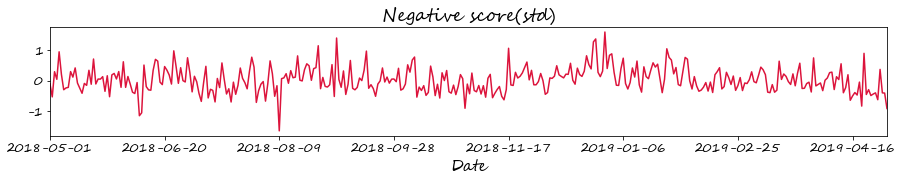

In [6]:
plt.figure(figsize=(15,2))
plt.title('Negative score(std)')
df_s['negative_std'].loc['2018-05-01':'2019-05-01'].plot(color='crimson')

1 year score data seem reasonable, no continued drop down or rise up, not much out liers  

Since daily data change drmaticly, to observe the big picture, I plot the data after taking mean of each 5 days(rolling)  

Date
2018-05-01         NaN
2018-05-02         NaN
2018-05-03         NaN
2018-05-04         NaN
2018-05-05    0.014452
2018-05-06   -0.059715
2018-05-07   -0.052613
2018-05-08   -0.084106
2018-05-09   -0.107671
2018-05-10   -0.029958
2018-05-11    0.124861
2018-05-12   -0.013243
2018-05-13   -0.066354
2018-05-14   -0.064310
2018-05-15   -0.147737
2018-05-16   -0.262313
2018-05-17   -0.146703
2018-05-18    0.010966
2018-05-19    0.452948
2018-05-20    0.396139
Name: positive_std, dtype: float64

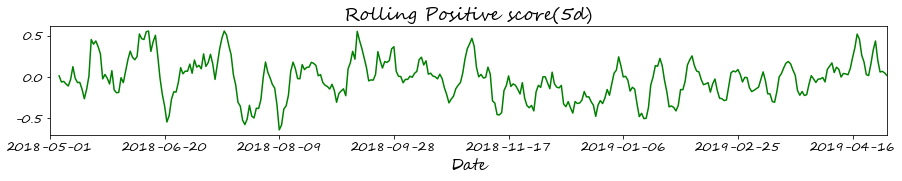

In [7]:
plt.figure(figsize=(15,2))
plt.title('Rolling Positive score(5d)')
roll_pos = df_s['positive_std'].loc['2018-05-01':'2019-05-01'].rolling(5).mean()
roll_pos.plot(color='green')
roll_pos[:20]

There's a more obvious trend now, so plot the close price to compare them  

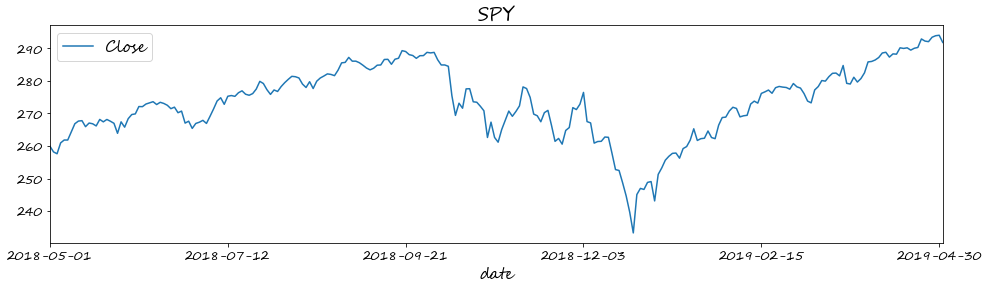

In [8]:
plt.title('SPY')
spy_p = df_p[df_p['Symbols']=='SPY']['close']
spy_p.loc['2018-05-01':'2019-05-01'].plot(label='Close')
plt.legend()

From the two figure, it's actually still hard to tell that whether the score data is corresponding to price data. Furthermore, the trend isn't similar, so this must not the ideal way to compare them.  

Considering the lenth of data is not the same, we don't have price data on holiday. Thus, to make more accurate figure, merge the data by date so that we could observe the data on one figure.  
Besides, the news data didn't belomg to any specific industry, so I choose SPY to compare with.  

In [9]:
spy_ = pd.merge(spy_p.loc['2017-05-01':],df_s.loc['2017-05-01':'2019-05-01'],how='outer', left_index=True,right_index=True)

spy_.head()

,close,positive,negative,positive_std,negative_std
2017-05-01,229.7639,0.027835,0.023133,0.369680,-0.129925
2017-05-02,229.8505,0.026440,0.021089,0.060406,-0.540285
2017-05-03,229.5714,0.022206,0.023453,-0.878239,-0.065740
2017-05-04,229.8409,0.030345,0.023757,0.926098,-0.004687
2017-05-05,230.7458,0.027553,0.023501,0.307043,-0.056161


Plot the data again  

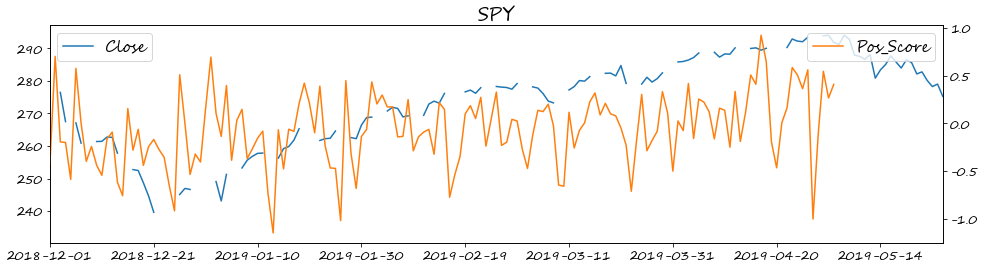

In [10]:
fig=plt.figure()
plt.title('SPY')
spy_['close'].loc['2018-12-01':].plot(label='Close',legend=True)
spy_['positive_std'].loc['2018-12-01':].plot(secondary_y=True,label='Pos_Score')

plt.legend()

Plot the data in different period, mark the date when the sentiment score is high and observe the price trend since then.  

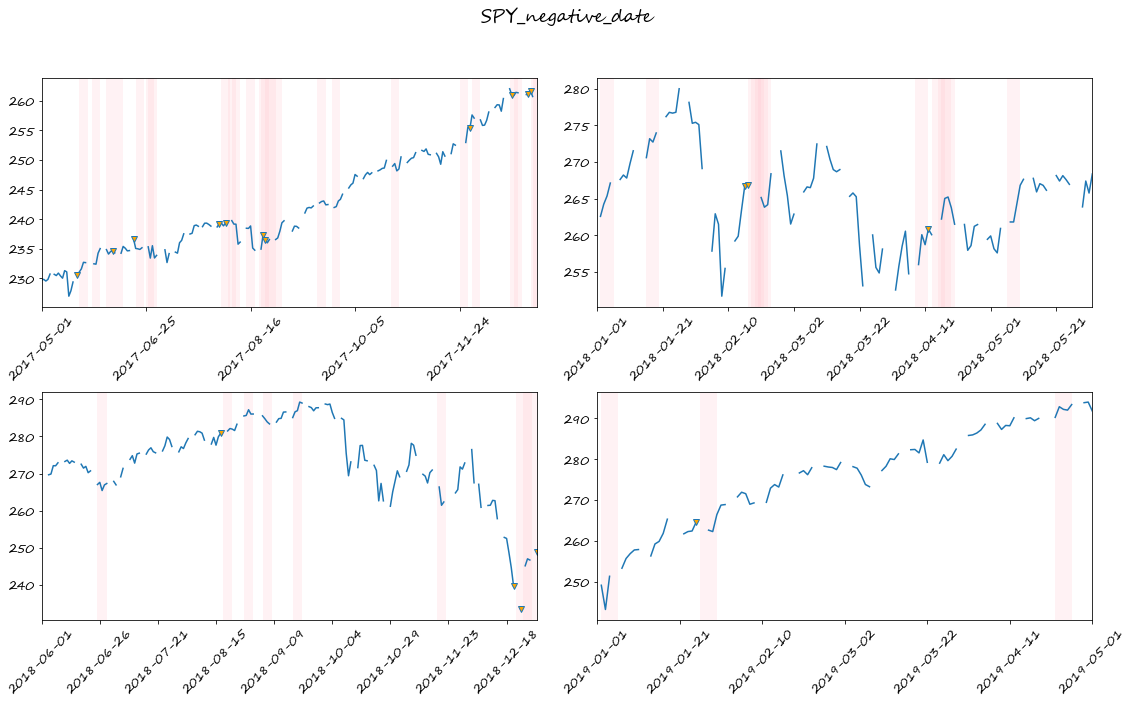

In [11]:
# mark the date when the negative score is high
def get_mark_loc(df):
    loc_ = []
    for i in df[df>0.8].index:
        loc_.append(df.index.get_loc(i))
    return loc_

def highlight(indices,ax):
    i=0
    while i<len(indices):
        ax.axvspan(indices[i]+1, indices[i]+5, facecolor='pink', edgecolor='none', alpha=.2)
        i+=1

fig,axes=plt.subplots(2,2,figsize=(16,10))
plt.suptitle('SPY_negative_date')

def subplot(close,score,ax):
    ax = close.plot(ax=ax,markevery=get_mark_loc(score), marker='v', markerfacecolor='orange')
    highlight(get_mark_loc(score), ax)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)


subplot(spy_['close'].loc['2017-05-01':'2017-12-31'],spy_['negative_std'].loc['2017-05-01':'2017-12-31'],axes[0,0])
subplot(spy_['close'].loc['2018-01-01':'2018-06-01'],spy_['negative_std'].loc['2018-01-01':'2018-06-01'],axes[0,1])
subplot(spy_['close'].loc['2018-06-01':'2018-12-31'],spy_['negative_std'].loc['2018-06-01':'2018-12-31'],axes[1,0])
subplot(spy_['close'].loc['2019-01-01':'2019-05-01'],spy_['negative_std'].loc['2019-01-01':'2019-05-01'],axes[1,1])
plt.tight_layout()
fig.subplots_adjust(top=0.88)

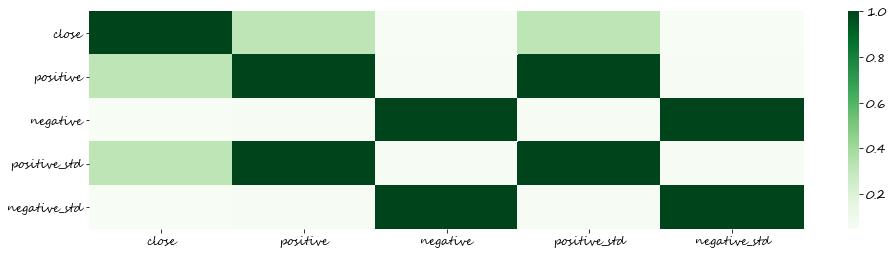

In [12]:
import seaborn as sns
corr = spy_.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap='Greens')#"Blues")


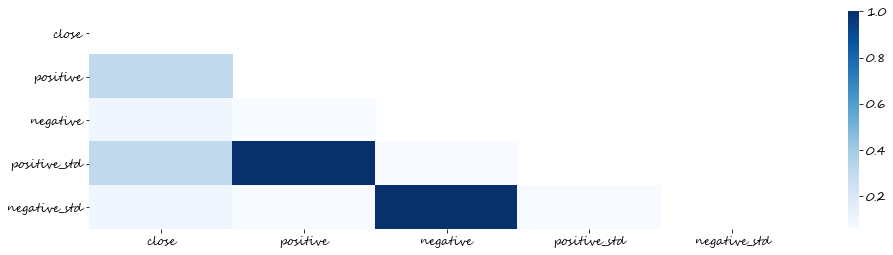

In [13]:
import numpy as np
df_p.index = pd.to_datetime(df_p.index)
# shift close price back 7 days
shift_p = df_p[df_p['Symbols']=='SPY']['close'].loc['2017-05-01':'2019-05-01'].shift(-7, freq='D')
shift_spy = pd.merge(shift_p,df_s.loc['2017-05-01':'2019-05-01'],how='outer', left_index=True,right_index=True)
sh_corr = shift_spy.corr()


mask = np.zeros_like(sh_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(sh_corr, xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,cmap='Blues',mask=mask)#,square=True)


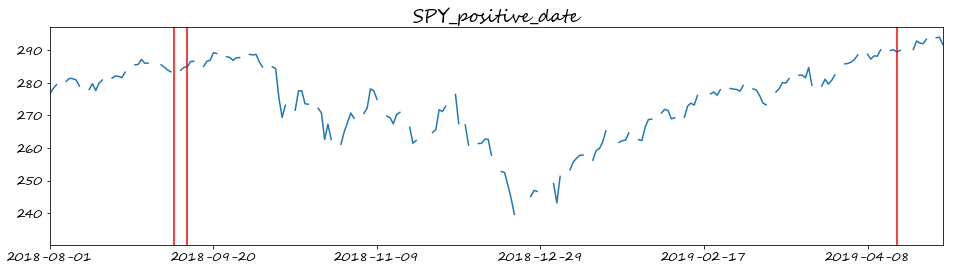

In [14]:
# mark the date when the positive score is high
plt.title('SPY_positive_date')
high_pos = get_mark_loc(spy_['positive_std'].loc['2018-08-01':'2019-05-01'])
spy_['close'].loc['2018-08-01':'2019-05-01'].plot()
for i in high_pos:
    plt.axvline(x=i,color='r')

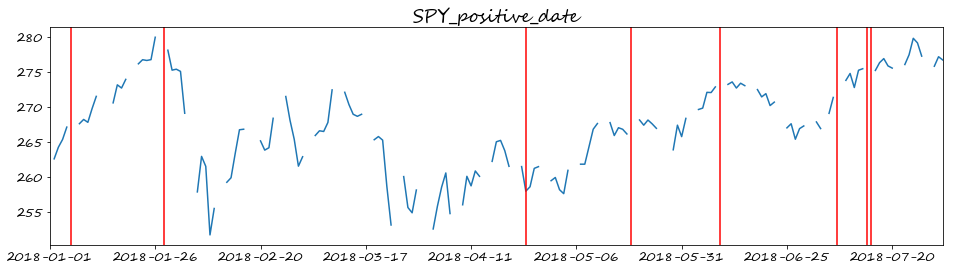

In [15]:
plt.title('SPY_positive_date')
high_pos = get_mark_loc(spy_['positive_std'].loc['2018-01-01':'2018-08-01'])
spy_['close'].loc['2018-01-01':'2018-08-01'].plot()
for i in high_pos:
    plt.axvline(x=i,color='r')

In [16]:
high_pos = get_mark_loc(spy_['positive_std'])

r = 0 # rise
d = 0 # drop 
for i in high_pos:
    change = spy_['close'][i+4]*100 - spy_['close'][i]*100
    
    if str(change) == 'nan':
        change = spy_['close'][i+5]*100 - spy_['close'][i+1]*100
    if str(change) == 'nan':
        change = spy_['close'][i+6]*100 - spy_['close'][i+2]*100
    if str(change) == 'nan':
        change = spy_['close'][i+3]*100 - spy_['close'][i-1]*100


    if int(change) > 0:
        r += 1
    else:
        d += 1

    #print(change)
    
print('The percentage that price will rise after getting high positive score: ',r/(r+d))

The percentage that price will rise after getting high positive score:  0.6


In [17]:
# sentiment score by "human Intelligence"
hi_score = pd.read_excel('data/Events&Sentiment.xlsx')
hi_score = hi_score.sort_values(by='Dates').reset_index(drop=True)
hi_score.head()

,Events/Market Condition,Dates,Scores
0,GOP Tax Cut,2017-12-19,-0.23
1,NaN,2017-12-20,-0.08
2,NaN,2017-12-21,-0.13
3,NaN,2017-12-22,-0.01
4,NaN,2017-12-23,0.01


In [18]:
event_loc = hi_score.dropna().index
#print(event_loc)
hi_score = hi_score.set_index('Dates')
#hi_score['Scores'].plot()

In [19]:
hi_df = pd.merge(spy_p.loc['2017-12-01':],hi_score,how='outer',left_index=True,right_index=True)
hi_df = pd.merge(df_s['positive_std'].loc['2017-12-01':],hi_df,how='outer',left_index=True,right_index=True)
hi_df = hi_df[pd.notnull(hi_df.index)]
hi_df = hi_df[pd.notnull(hi_df['Scores'])]
event_date = hi_df['Events/Market Condition'].dropna().index
event_ = []
for i in event_date:
    event_.append(hi_df.index.get_loc(i))

print(event_)
hi_df.head()

[0, 12, 19, 38, 48, 58]


,positive_std,close,Events/Market Condition,Scores
2017-12-19,-0.182911,261.0405,GOP Tax Cut,-0.23
2017-12-20,-0.647250,260.9037,NaN,-0.08
2017-12-21,-0.610387,261.4411,NaN,-0.13
2017-12-22,0.141626,261.3727,NaN,-0.01
2017-12-23,0.014529,NaN,NaN,0.01


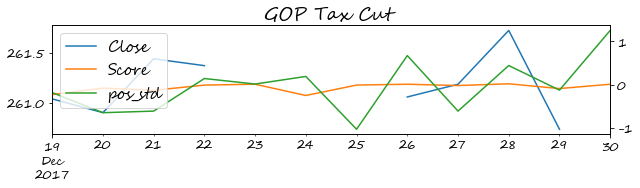

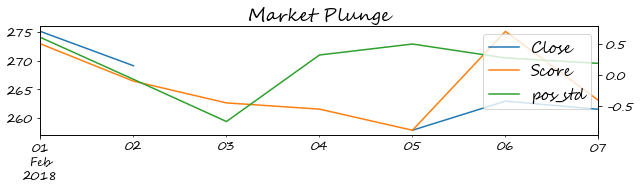

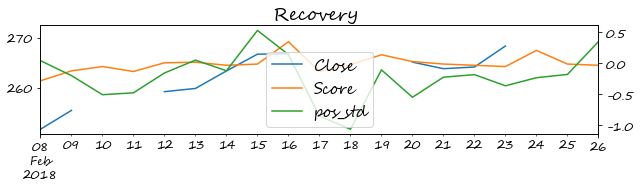

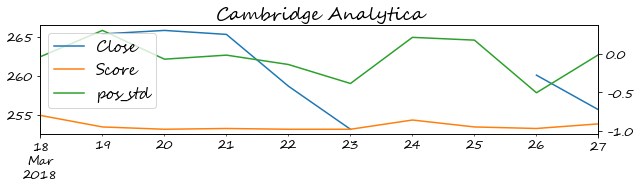

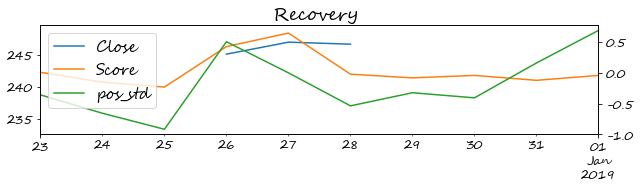

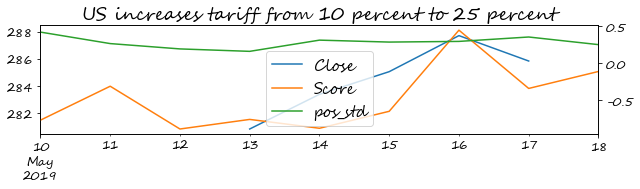

In [20]:
# plot the close price & score after the event
for i in range(len(event_)):
    plt.figure(figsize=(10,2))
    plt.title(hi_df['Events/Market Condition'][event_[i]])
    if i != len(event_)-1:
        ax1 = hi_df['close'][event_[i]:event_[i+1]].plot(label='Close')#,legend=True)
        ax2 = hi_df['Scores'][event_[i]:event_[i+1]].plot(secondary_y=True,label='Score')
        ax3 = hi_df['positive_std'][event_[i]:event_[i+1]].plot(secondary_y=True,label='pos_std')
    else:
        ax1 = hi_df['close'][event_[i]:len(hi_df['close'])].plot(label='Close')#,legend=True)
        ax2 = hi_df['Scores'][event_[i]:len(hi_df['close'])].plot(secondary_y=True,label='Score')
        ax3 = hi_df['positive_std'][event_[i]:len(hi_df['close'])].plot(secondary_y=True,label='pos_std')
        
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()


    plt.legend(h1+h2, l1+l2)

In [21]:
spdr = ['XLI','XLV','XLK','XLE','XLF']

industrial = pd.read_csv('./data/industrial.csv').drop(columns=['Unnamed: 0','Content']).set_index('Date')
healthcare = pd.read_csv('./data/healthcare.csv').drop(columns=['Unnamed: 0','Content']).set_index('Date')
tech = pd.read_csv('./data/tech.csv').drop(columns=['Unnamed: 0','Content']).set_index('Date')
energy = pd.read_csv('./data/energy.csv').drop(columns=['Unnamed: 0','Content']).set_index('Date')
finance = pd.read_csv('./data/finance.csv').drop(columns=['Unnamed: 0','Content']).set_index('Date')
sector = [industrial,healthcare,tech,energy,finance]

In [23]:
industrial.head()

,positive,negative,positive_std,negative_std
Date,,,,
2013-05-07,0.024447,0.018626,-0.300123,-0.719175
2013-05-08,0.024876,0.020730,-0.227190,-0.392130
2013-05-10,0.021661,0.037906,-0.774283,2.278560
2013-05-13,0.023364,0.028972,-0.484340,0.889425
2013-05-14,0.018323,0.033827,-1.342293,1.644257


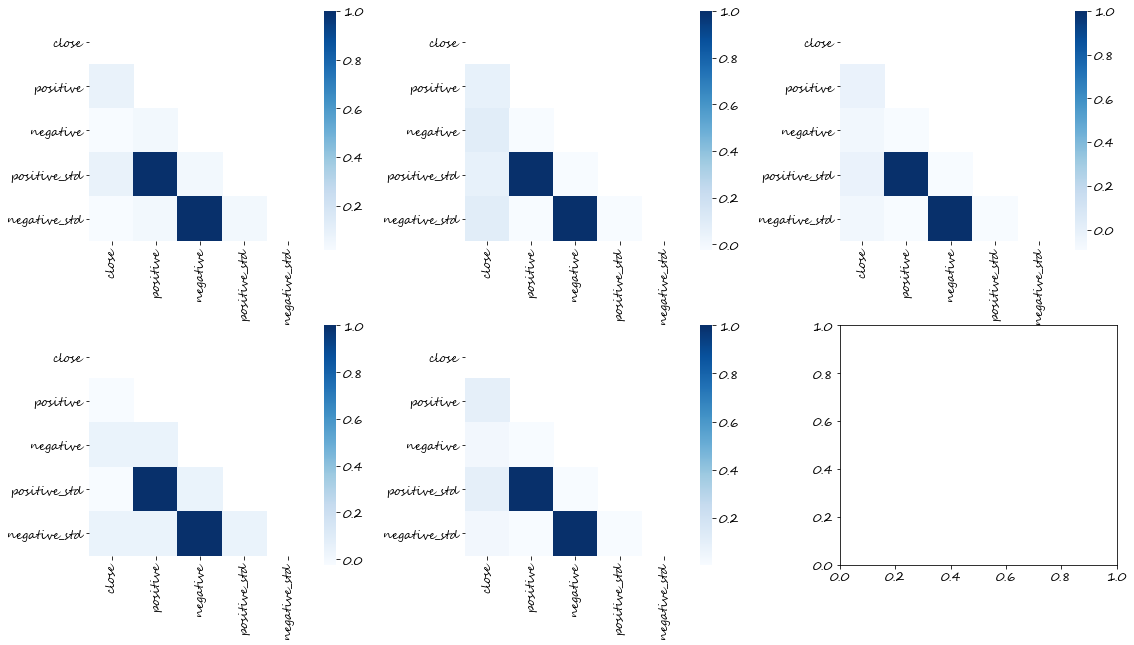

In [24]:
def sort_df(sym,sec):
    etf = df_p[df_p['Symbols']==sym]['close'].loc['2015-05-01':'2019-05-01']
    etf_df = pd.merge(etf,sec.loc['2015-05-01':'2019-05-01'],how='outer', left_index=True,right_index=True)
    return etf_df

def plot_heat(df_corr,ax):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(df_corr,ax=ax, 
                xticklabels=corr.columns.values,yticklabels=corr.columns.values,
                cmap='Blues',mask=mask,square=True)

fig,axes=plt.subplots(2,3,figsize=(16,10))

m = 0
n = 0
for i in range(len(spdr)):
    if i <= 2:
        plot_heat(sort_df(spdr[i],sector[i]).dropna().corr(),axes[0,m])
        m += 1
    else:
        plot_heat(sort_df(spdr[i],sector[i]).dropna().corr(),axes[1,n])
        n += 1

plt.tight_layout()
fig.subplots_adjust(top=0.88)

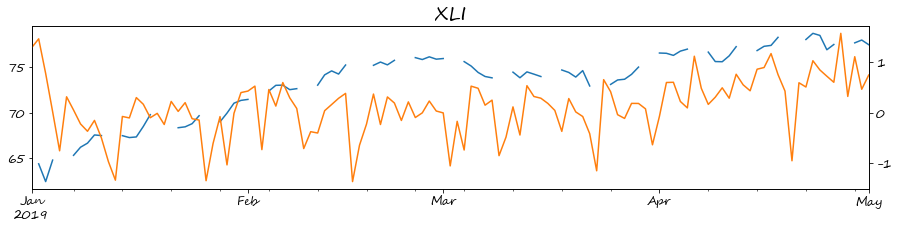

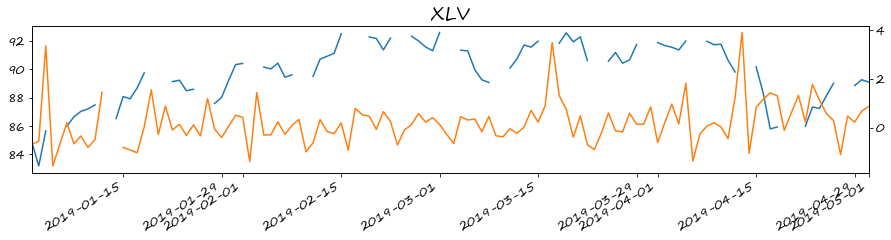

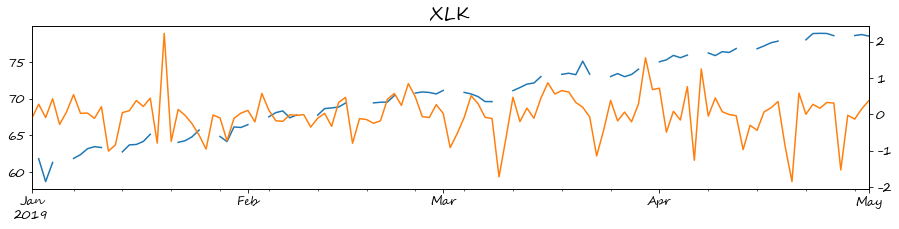

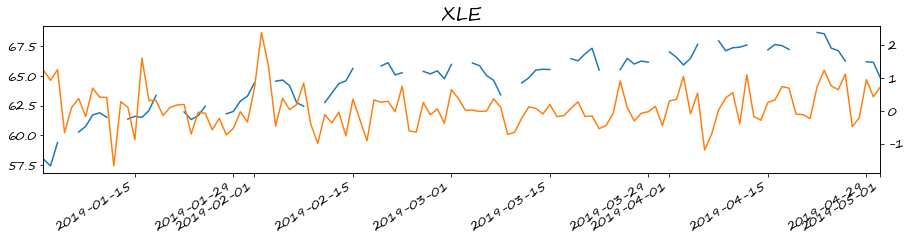

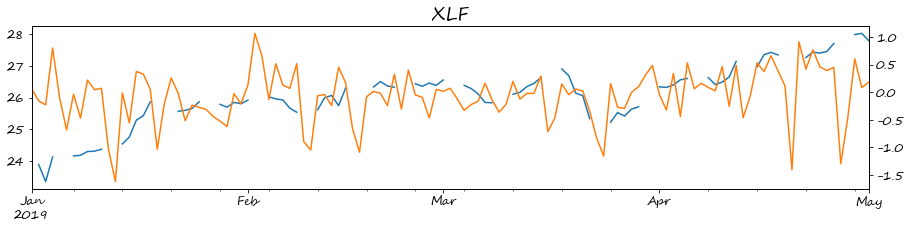

In [25]:
for i in range(len(spdr)):
    plt.figure(figsize=(15,3))
    plt.title(spdr[i])
    sort_df(spdr[i],sector[i])['close'].loc['2019-01-01':].plot()
    sort_df(spdr[i],sector[i])['positive_std'].loc['2019-01-01':].plot(secondary_y=True)

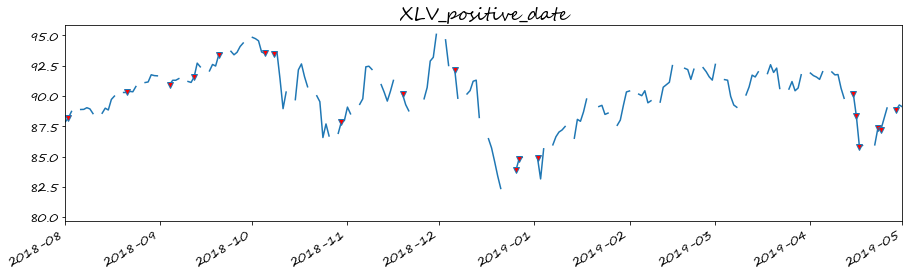

In [34]:
# mark the date when the positive score is high
plt.figure(figsize=(15,4))
plt.title('XLV_positive_date')
high_pos1 = get_mark_loc(sort_df('XLV',industrial)['positive_std'].loc['2018-08-01':'2019-05-01'])
sort_df('XLV',industrial)['close'].loc['2018-08-01':'2019-05-01'].plot(markevery=high_pos1, marker='v', markerfacecolor='r')
